In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [3]:
df.drop('PassengerId',axis=1,inplace =True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
df['Embarked'].mode()

0    S
dtype: object

In [5]:
df['Cabin'] = df['Cabin'].fillna('NO_TYPE')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [6]:
df.isna().sum()/df.shape[0]

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
dtype: float64

In [7]:
df['Name_ne']= df['Name'].apply(lambda a : str.split(a,',')[1].split('.')[0])
df.drop('Name',axis=1,inplace=True)
df['Cabin_n'] = df['Cabin'].apply(lambda a : a[0])

In [8]:
print('PClass - >',df['Pclass'].unique())
print('Name ->',df['Name_ne'].unique())
print('SibSp ->',df['SibSp'].unique())
print('Parch -> ',df['Parch'].unique())
print('Cabin -> ',df['Cabin'].unique())
print('Embarked ->',df['Embarked'].unique())
print('Cabin_n ->',df['Cabin_n'].unique())

PClass - > [3 1 2]
Name -> [' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']
SibSp -> [1 0 3 4 2 5 8]
Parch ->  [0 1 2 5 3 4 6]
Cabin ->  ['NO_TYPE' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B

In [9]:
cat_cols = ['Cabin_n','Embarked','Parch','SibSp','Name_ne','Pclass']
df.drop('Cabin',axis =1,inplace = True)

In [10]:
def cat_plot(var):
    fig,ax = plt.subplots(ncols =2 ,figsize= (10,10))
    sns.countplot(x=var , hue = 'Survived',data = df,ax =ax[0])
    sns.pointplot(x = var ,y ='Survived' ,data = df,ax = ax[1])
    plt.show()

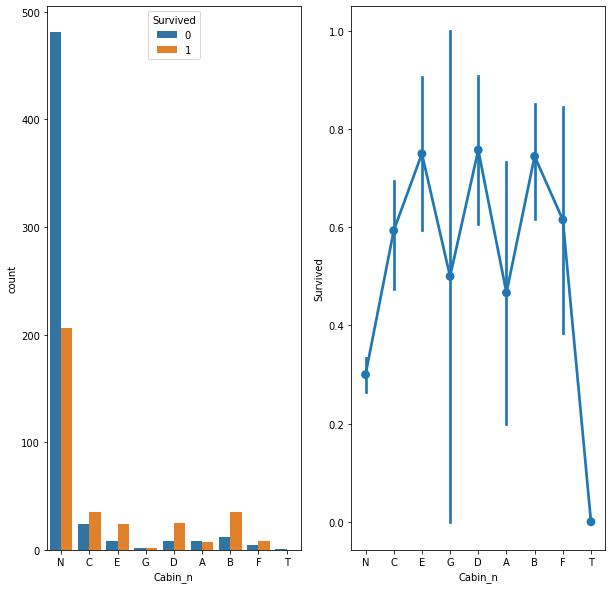

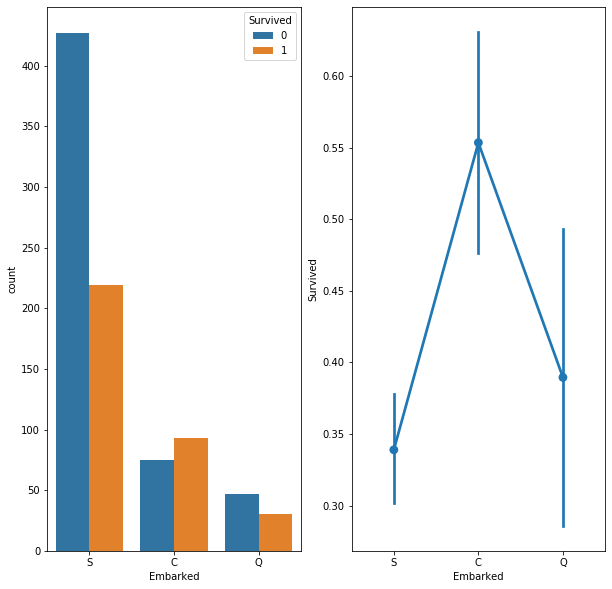

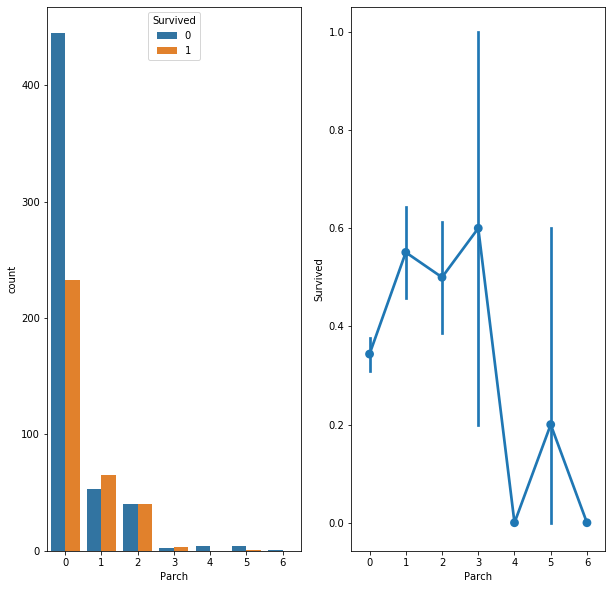

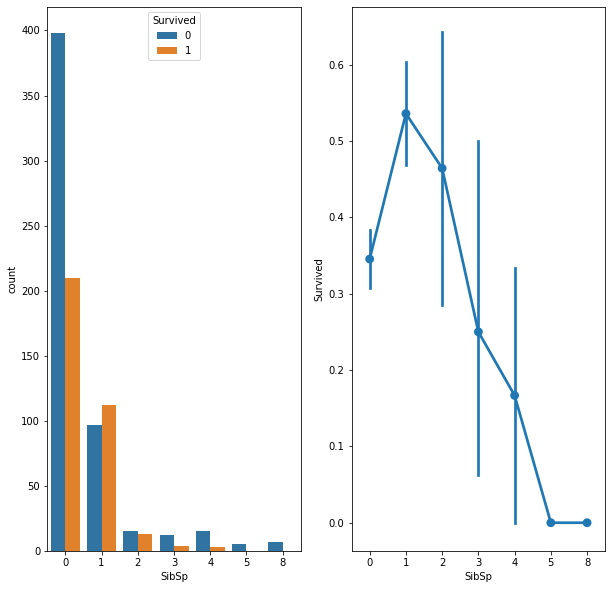

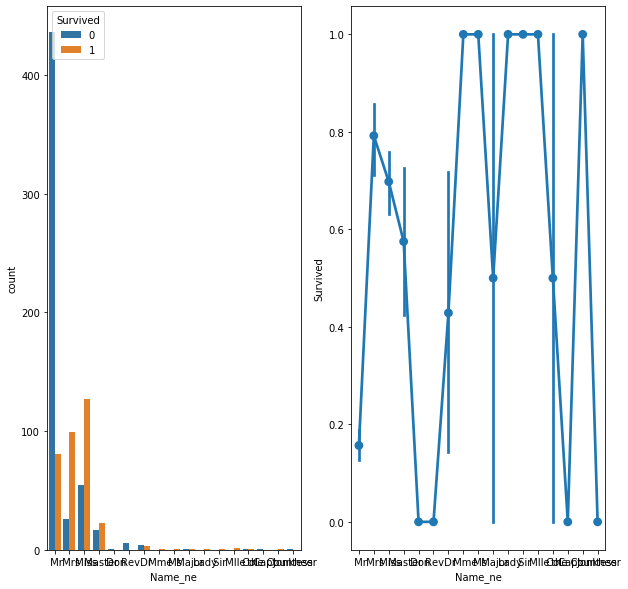

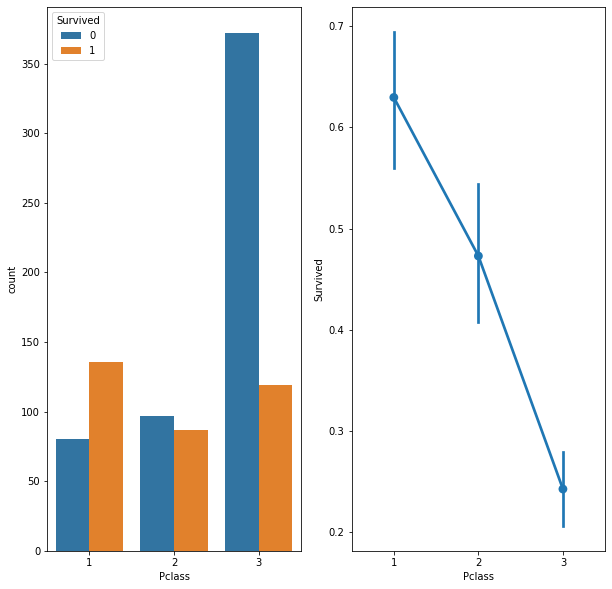

In [11]:
for i in cat_cols:
    cat_plot(i)

In [12]:
from sklearn.preprocessing import LabelEncoder
lb_c = LabelEncoder()
df['Cabin_n'] = lb_c.fit_transform(df['Cabin_n'])
lb_e = LabelEncoder()
df['Embarked'] = lb_e.fit_transform(df['Embarked'])
lb_ne =  LabelEncoder()
df['Name_ne'] = lb_ne.fit_transform(df['Name_ne'])

In [13]:
lb_s = LabelEncoder()
df['Sex'] = lb_s.fit_transform(df['Sex'])

In [14]:
#mt = df['Ticket'].apply(lambda a : str.split(a," ")[0])[:8]
#df.drop('Ticket',axis=1,inplace = True)
#d_tic = {}
#ind = 0
#for i in mt.values:
#    d_tic[i] = ind
#    ind += 1
#d_tic['Others'] = ind
#d_tic

In [15]:
#for i in range(df.shape[0]):
#    if df['Ticket'][i] in d_tic.keys():
#        df['Ticket'].iloc[i] = d_tic[ df['Ticket'][i]]
#    else:
#        df['Ticket'].iloc[i] = d_tic['Others']
#cat_plot('Ticket')

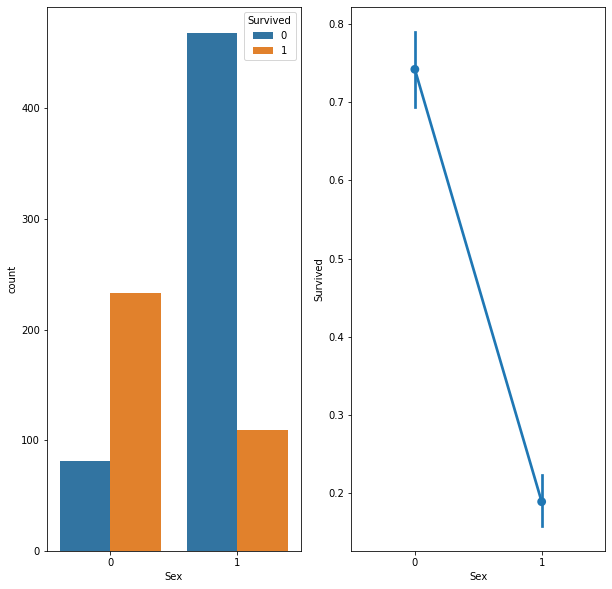

In [16]:
cat_plot('Sex')

In [17]:
#cat_cols =cat_cols +['Ticket' ,'Sex']
cat_cols =cat_cols +['Sex']


In [18]:
cat_cols

['Cabin_n', 'Embarked', 'Parch', 'SibSp', 'Name_ne', 'Pclass', 'Sex']

In [19]:
cont_cols = ['Age', 'Fare']

In [20]:
df.drop('Ticket',axis=1,inplace=True)

In [21]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from category_encoders import WOEEncoder,TargetEncoder

woe = WOEEncoder(cols=cat_cols)
df[cat_cols] = woe.fit_transform(df[cat_cols],df.iloc[:,0])

sc = StandardScaler()
df[cont_cols] = sc.fit_transform(df[cont_cols])

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.model_selection import cross_val_score ,train_test_split ,GridSearchCV
from sklearn.metrics import confusion_matrix ,roc_auc_score,accuracy_score

In [23]:
#clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=52),n_estimators=25)
#clf.fit(df.iloc[:,1:],df.iloc[:,0])
#clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2)
#clf.fit(df.iloc[:,1:],df.iloc[:,0])

In [24]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],stratify =df.iloc[:,0],test_size = 0.2 ,random_state =42)

In [25]:
prams = [{'max_depth' : [2,3,4,5,6,7,9,10,11,12],
          'criterion' :['gini','entropy'],
          'min_samples_split' :range(2 , 100 ,1)
         }]

In [26]:
clf = GridSearchCV(estimator=DecisionTreeClassifier() ,param_grid=prams ,cv =7,n_jobs=-1 )
clf.fit(x_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                    

In [27]:
clf.best_params_,clf.best_score_

({'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 52},
 0.8202152147987907)

In [28]:
clf2 = DecisionTreeClassifier(ccp_alpha =0,criterion='gini',max_depth=3,min_samples_split=52)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=52,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
y_pred = clf.predict(x_test)

In [30]:
print('Confusion_matrix \n',confusion_matrix(y_test.values , y_pred))
print('Roc_auc ',roc_auc_score(y_test,clf2.predict_proba(x_test)[:,1]))

Confusion_matrix 
 [[93 17]
 [17 52]]
Roc_auc  0.8662714097496707


In [31]:
accuracy_score(y_test,clf2.predict(x_test))

0.8100558659217877

In [32]:
sc = cross_val_score(clf2, x_train,y_train,cv =7)
sc.mean() ,sc.std()

(0.8202152147987907, 0.03181650433967256)

In [33]:
from yellowbrick.classifier import class_prediction_error,roc_auc,confusion_matrix,classification_report

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


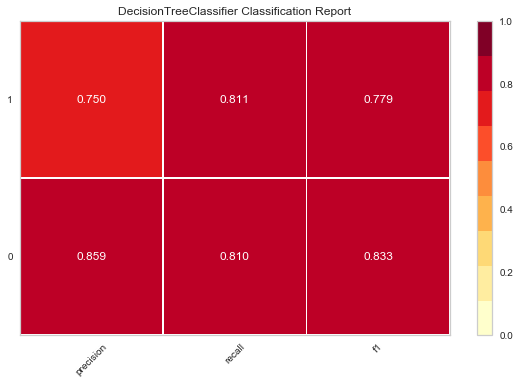

In [34]:
ax = classification_report(clf2 , df.iloc[:,1:],df.iloc[:,0],test_size =0.2,random_state =42)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


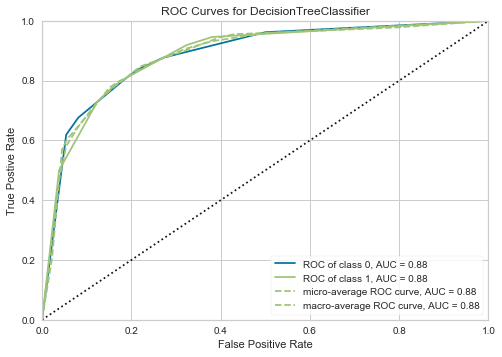

In [35]:
ax = roc_auc(clf2 , df.iloc[:,1:],df.iloc[:,0],test_size =0.2,random_state =42)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


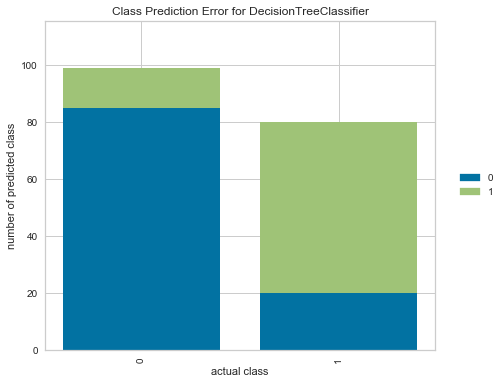

In [36]:
ax = class_prediction_error(clf2 , df.iloc[:,1:],df.iloc[:,0],test_size =0.2,random_state =42)